<a href="https://colab.research.google.com/github/lisaong/mldds-courseware/blob/master/03_TextImage/tfidf_manual_compute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Processing

This notebook covers:
- Text Processing Techniques
- Count vectorization
- TFIDF computation


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## Text processing:
- Tokenise: split text into words
- Lemmatise: look at word form, considering noun, adjective, etc
- Stem: get the word stem (bluntly chop off the end)

### Goals:
- Identify unique words
- Avoid duplicating the same word form (e.g. cat, cats) in order to keep number of features small

### Curse of Dimensionality:
- 1 word is at least 1 feature (not considering N-grams - sequences of N words)
- Reducing number of words will improve scalability

## NLTK

We will exploring using NLTK (the Natural Language Processing Toolkit) to perform text pre-processing.

(You should already have NLTK installed if you followed the Workshop Setup Instructions.)

In [5]:
# Download corpus for text pre-processing. These are not included in NLTK automatically because of file size.

import nltk
nltk.download('punkt') # tokenisation
nltk.download('wordnet') # lemmatisation
nltk.download('stopwords') # stop words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Tokenise

In [6]:
from nltk import word_tokenize

text = 'Hello this is a test.'

word_tokenize(text)

['Hello', 'this', 'is', 'a', 'test', '.']

## Lemmatise

In [7]:
text = 'he liked cats and dogs, and teaching machines to learn'

# just tokenisation
word_tokenize(text)

['he',
 'liked',
 'cats',
 'and',
 'dogs',
 ',',
 'and',
 'teaching',
 'machines',
 'to',
 'learn']

In [8]:
# WordNet is a lexical database, it is used to
# find the lemma of a word based on language rules (verb, etc)
from nltk.stem import WordNetLemmatizer

text = 'he liked cats and dogs, and teaching machines to learn fasting mice women men man'

# tokenise: breaks up sentence into words
tokens = word_tokenize(text)

# lemmatise using list comprehension
# WordNetLemmatizer
wnl = WordNetLemmatizer()

# result = [] 
# for t in tokens:
#     print(wnl.lemmatize(t))
#     result.append(wnl.lemmatize(t))

# creates a list of lemmatised tokens
# 
# text = 'he liked cats and dogs, and teaching machines to learn fasting mice men women'

[wnl.lemmatize(t) for t in tokens]

['he',
 'liked',
 'cat',
 'and',
 'dog',
 ',',
 'and',
 'teaching',
 'machine',
 'to',
 'learn',
 'fasting',
 'mouse',
 'woman',
 'men',
 'man']

## Stem

In [9]:
# Stemmer looks at word endings and chops it off
# based on some rules, e.g: es -> e
from nltk.stem import SnowballStemmer

text = 'he liked cats and dogs, and teaching teach machines to learn fasting mice men women'

# tokenise
tokens = word_tokenize(text)

# stemmer for English
stm = SnowballStemmer('english')

[stm.stem(t) for t in tokens]

['he',
 'like',
 'cat',
 'and',
 'dog',
 ',',
 'and',
 'teach',
 'teach',
 'machin',
 'to',
 'learn',
 'fast',
 'mice',
 'men',
 'women']

## Stop words

In [10]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

text = 'he liked cats and dogs, and teaching machines to learn'

# lower case
lower = text.lower()

# tokenize
tokens = word_tokenize(lower)

# remove stop words
[t for t in tokens if (t not in stop)]

['liked', 'cats', 'dogs', ',', 'teaching', 'machines', 'learn']

In [11]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
len(stop) # number of stop words

179

In [0]:
# add / remove words to stoplist
# This changes the local copy, not the original stoplist

stop.add('lah')
stop.remove('because') # changes the stop list in-place
                       # so running this cell again will return
                       # KeyError

# Vectorise Text

Vectorisation converts words into vectors of numbers

Common ways:
- By word count: CountVectorizer
- By word and document frequency: TfidfVectorizer
- By word vectors (gensim Word2Vec)

## Word Count Vectorisation

* Words that are used more frequently get a higher count

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
   'This is the first document.',
   'This document is the second document.',
   'And this is the third one.',
   'Is this the first document?',
]

# sklearn's stoplist, with unigram & bigram
#countvec = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# sklearn stoplist is lousy, use nltk's
countvec = CountVectorizer(ngram_range=(1, 2), stop_words=list(stop))
result = countvec.fit_transform(corpus)
print(result) # sparse matrix, (location) non-zero value

  (0, 2)	1
  (0, 0)	1
  (0, 3)	1
  (1, 0)	2
  (1, 5)	1
  (1, 1)	1
  (1, 6)	1
  (2, 7)	1
  (2, 4)	1
  (2, 8)	1
  (3, 2)	1
  (3, 0)	1
  (3, 3)	1


In [15]:
# convert sparse matrix to dense matrix using todense()
result.todense()

matrix([[1, 0, 1, 1, 0, 0, 0, 0, 0],
        [2, 1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 1],
        [1, 0, 1, 1, 0, 0, 0, 0, 0]])

In [16]:
# vocabulary
countvec.get_feature_names()

# create dataframe with count vectors as data
# and vocabulary as headers

# add the original text as the 'text column 
df = pd.DataFrame(result.todense(),
             columns=countvec.get_feature_names())
df['text'] = corpus
df

,document,document second,first,first document,one,second,second document,third,third one,text
0,1,0,1,1,0,0,0,0,0,This is the first document.
1,2,1,0,0,0,1,1,0,0,This document is the second document.
2,0,0,0,0,1,0,0,1,1,And this is the third one.
3,1,0,1,1,0,0,0,0,0,Is this the first document?


## Word and Document Frequency (TF-IDF) Vectorisation

- TF: Term Frequency: rewards words commonly used in a document
- IDF: Inverse Document Frequency: penalises words commonly used in all documents

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
   'This document is the first document.',
   'This document is the second document.',
   'And this is the third one.',
   'Is this document the first document?',
]

# create vectoriser
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words=list(stop))

# fit transform
result = tfidf.fit_transform(corpus)

# inspect matrix
result.todense()

matrix([[0.6829022 , 0.42176004, 0.        , 0.42176004, 0.42176004,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.59329727, 0.        , 0.46475741, 0.        , 0.        ,
         0.        , 0.46475741, 0.46475741, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.57735027, 0.        , 0.        , 0.57735027, 0.57735027],
        [0.6829022 , 0.42176004, 0.        , 0.42176004, 0.42176004,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

In [18]:
# inspect vocabulary using get_feature_names()

vocab = tfidf.get_feature_names()
vocab

['document',
 'document first',
 'document second',
 'first',
 'first document',
 'one',
 'second',
 'second document',
 'third',
 'third one']

In [19]:
# create dataframe with count vectors as data
# and vocabulary as headers
# remember to convert vectors from sparse to dense matrix

# add the original text as the 'text column 
df = pd.DataFrame(result.todense(),
             columns=vocab)

# add the original text as the 'text column 
df['text'] = corpus
df

,document,document first,document second,first,first document,one,second,second document,third,third one,text
0,0.682902,0.42176,0.000000,0.42176,0.42176,0.00000,0.000000,0.000000,0.00000,0.00000,This document is the first document.
1,0.593297,0.00000,0.464757,0.00000,0.00000,0.00000,0.464757,0.464757,0.00000,0.00000,This document is the second document.
2,0.000000,0.00000,0.000000,0.00000,0.00000,0.57735,0.000000,0.000000,0.57735,0.57735,And this is the third one.
3,0.682902,0.42176,0.000000,0.42176,0.42176,0.00000,0.000000,0.000000,0.00000,0.00000,Is this document the first document?


In [20]:
# Computing TFIDF manually to check the values above

# first, we examine the settings used for our TFIDF vectorizer
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['that', "that'll", 'as', 'each', 'haven', 'other',
                            "you've", "wasn't", 'at', 'his', 's', 'the', 'same',
                            'your', "isn't", 'about', 'not', 'am', 'mightn',
                            'of', 'or', "she's", 'against', 'do', 'my', 'most',
                            "weren't", 'too', 'm', 'been', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

Based on https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting, the equation used is:

$\text{tf-idf(t,d)}=\text{tf(t,d)} \times \text{idf(t)}$

Where:

$\text{idf}(t) = \log{\frac{n}{1+\text{df}(t)}}$

When smooth_idf=True, the TFIDF computed tries to avoid zero values by adding a 1:

$\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1$

Where $n$ is the total number of documents in the document set, and $\text{df}(t)$ is the number of documents in the document set that contain term $t$. The resulting tf-idf vectors are then normalized by the Euclidean norm:

$v_{norm} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v{_1}^2 +
v{_2}^2 + \dots + v{_n}^2}}$

In [21]:
corpus

['This document is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this document the first document?']

In [22]:
# term frequency
countvec = CountVectorizer(ngram_range=(1, 2), stop_words=list(stop))

tf_sparse = countvec.fit_transform(corpus)
tf = tf_sparse.todense()
tf

matrix([[2, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [2, 0, 1, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [2, 1, 0, 1, 1, 0, 0, 0, 0, 0]])

In [23]:
# document frequency
# the number of documents in the document set that contain term t
# can be computed by inspecting how many non-zero counts there are in each column

df = (tf > 0).sum(axis=0)
df

matrix([[3, 2, 1, 2, 2, 1, 1, 1, 1, 1]])

In [24]:
n = len(corpus)
n

4

In [25]:
# inverse document frequency (smooth_idf=True version)
idf = np.log(n / (1 + df)) + 1
idf

matrix([[1.        , 1.28768207, 1.69314718, 1.28768207, 1.28768207,
         1.69314718, 1.69314718, 1.69314718, 1.69314718, 1.69314718]])

In [26]:
# tf x idf
# element-wise multiply
tfidf_raw = np.multiply(tf, idf)
pd.DataFrame(tfidf_raw, columns=vocab)

,document,document first,document second,first,first document,one,second,second document,third,third one
0,2.0,1.287682,0.000000,1.287682,1.287682,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.0,0.000000,1.693147,0.000000,0.000000,0.000000,1.693147,1.693147,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,1.693147,0.000000,0.000000,1.693147,1.693147
3,2.0,1.287682,0.000000,1.287682,1.287682,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
# compute euclidean norm for each document
v_norm = np.linalg.norm(tfidf_raw, axis=1)
v_norm

array([2.99572618, 3.54968198, 2.93261694, 2.99572618])

In [28]:
# [:, None] allows tfidf_raw to be divided by each vector element
# for example, first row will be divided by v_norm[0], second row by v_norm[1], etc
tfidf = tfidf_raw / v_norm[:, None]
tfidf

matrix([[0.66761776, 0.42983971, 0.        , 0.42983971, 0.42983971,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.56343076, 0.        , 0.4769856 , 0.        , 0.        ,
         0.        , 0.4769856 , 0.4769856 , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.57735027, 0.        , 0.        , 0.57735027, 0.57735027],
        [0.66761776, 0.42983971, 0.        , 0.42983971, 0.42983971,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

In [29]:
# compare with TfidfVectorizer's output
result.todense()

matrix([[0.6829022 , 0.42176004, 0.        , 0.42176004, 0.42176004,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.59329727, 0.        , 0.46475741, 0.        , 0.        ,
         0.        , 0.46475741, 0.46475741, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.57735027, 0.        , 0.        , 0.57735027, 0.57735027],
        [0.6829022 , 0.42176004, 0.        , 0.42176004, 0.42176004,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

In [30]:
# the values are within +/-0.02, possibly due to floating point rounding error
abs(tfidf - result.todense())

matrix([[0.01528444, 0.00807967, 0.        , 0.00807967, 0.00807967,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.02986651, 0.        , 0.01222819, 0.        , 0.        ,
         0.        , 0.01222819, 0.01222819, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.01528444, 0.00807967, 0.        , 0.00807967, 0.00807967,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

## Word2Vec

Word2Vec generates word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings.

### Gensim

Gensim is a Python library to train word vectors, and to load pre-trained word vectors.

(You should already have Gensim installed if you followed the Workshop Setup Instructions.)

https://radimrehurek.com/gensim/models/word2vec.html
https://radimrehurek.com/gensim/models/keyedvectors.html

In [0]:
from gensim.models import Word2Vec

corpus = [
    'Dashing through the snow',
    'In a one-horse open sleigh',
    'Over the fields we go',
    'Laughing all the way',
    'Bells on bob-tail ring',
    'Making spirits bright',
    'What fun it is to ride and sing a sleighing song tonight'
]

# split text into words
corpus_tokens = [word_tokenize(doc.lower()) for doc in corpus]

vector_size=10 # vector representation (typically about 50-100 for larger vocabs)

window_size=3 # how many words to see around it (depending on task)

# train
word2vec = Word2Vec(corpus_tokens, size=vector_size, 
                    window=window_size,
                    min_count=1, workers=4)

# model.save("word2vec.model") # save for use later

In [0]:
# lookup vector using wv



In [0]:
# find similar words using most_similar



In [0]:
# inspect vocabulary using wv.vocab



In [0]:
# get word vectors using vectors



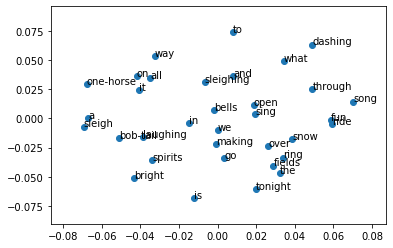

In [32]:
# To explore word vectors, you can plot them in 2d space
# (Notice how useful PCA is?)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
wv_2d = pca.fit_transform(word2vec.wv.vectors)

fig, ax = plt.subplots()

# scatter plot
ax.scatter(wv_2d[:, 0], wv_2d[:, 1])

# annotate each point using the words
for i, word in enumerate(word2vec.wv.vocab):
    ax.annotate(word, (wv_2d[i, 0], wv_2d[i, 1]))

### Pre-trained Word2Vec models

Instead of training your own word2vec, you can alternatively load the (large!) pre-trained models

https://github.com/RaRe-Technologies/gensim-data

These are most commonly used when training Neural Networks, because scikit-learn cannot handle non-scalar features well.  :(